In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Balanced_data.csv')

In [3]:
import joblib

In [4]:
model = joblib.load("extraTrees_finetuned.pkl")
features = joblib.load("features.pkl")
minmax = joblib.load("featuresScaleMinMax.pkl")

In [5]:
features

['school_district',
 'parent_teacher_progress_discussions',
 'parent_highest_grade',
 'child_age',
 'highest_grade',
 'wealth_index',
 'highest_grade_2019_20']

In [5]:
 df.rename(columns={'parent_highest_grade': 'learners_highest_grade', 'B': 'Column2', 'C': 'Column3'})

Index(['child_age', 'highest_grade', 'completed_grade', 'target',
       'highest_grade_2019_20', 'child_labour', 'receives_homework',
       'helped_with_homework', 'school_governing_body_availability',
       'attended_governing_body_meeting', 'parent_attended_school_events',
       'parent_teacher_progress_discussions',
       'school_affected_by_natural_disaster',
       'school_affected_by_man_made_disaster', 'home_language',
       'class_language', 'reading_ability', 'residential_area',
       'school_district', 'child_gender', 'parent_highest_education_level',
       'parent_highest_grade', 'wealth_index', 'parent_attended_school'],
      dtype='object')

In [6]:
df.target.value_counts()

0    13179
1    13179
Name: target, dtype: int64

In [90]:
X = df.drop(columns= 'target')
y = df.target

In [91]:
features = X.columns
minMax = MinMaxScaler()
X = minMax.fit_transform(X[best_features])
X = pd.DataFrame(X, columns=best_features)

In [93]:
minMax

MinMaxScaler()

In [12]:
# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

In [13]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [02:25<00:03,  3.47s/it]

[LightGBM] [Info] Number of positive: 7907, number of negative: 7907
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 15814, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [02:25<00:00,  5.03s/it]


In [14]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.96,0.96,0.96,0.95,1.91
BaggingClassifier,0.95,0.95,0.95,0.95,0.50
DecisionTreeClassifier,0.95,0.95,0.95,0.95,0.12
RandomForestClassifier,0.95,0.95,0.95,0.95,1.70
ExtraTreeClassifier,0.94,0.94,0.94,0.94,0.06
XGBClassifier,0.94,0.94,0.94,0.94,0.51
LGBMClassifier,0.93,0.93,0.93,0.93,0.82
LabelPropagation,0.93,0.93,0.93,0.93,38.51
LabelSpreading,0.93,0.93,0.93,0.93,33.15


In [15]:
import time

In [16]:
start = time.time()

In [17]:
end= time.time()

In [18]:
end-start

0.39530086517333984

In [19]:
rf = RandomForestClassifier()

In [20]:
start = time.time()
rf.fit(X_train,y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}')

time taken for training 1.685


In [21]:
print('training RandomForestClassifier\n')
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
model.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

training RandomForestClassifier

time taken for training 1.981

Validation Accuracy: 0.95

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2636
           1       0.91      0.99      0.95      2636

    accuracy                           0.95      5272
   macro avg       0.95      0.95      0.95      5272
weighted avg       0.95      0.95      0.95      5272

time taken for training on the full training + validation set 3.044 seconds

Test Accuracy: 0.95

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2636
           1       0.92      1.00      0.96      2636

    accuracy                           0.95      5272
   macro avg       0.96      0.95      0.95      5272
weighted avg       0.96      0.95      0.95      5272

Confusion Matrix:
[[2410  226]
 [  12 2624]]


In [22]:
# model.feature_importances_

In [23]:
# X.columns

In [24]:
print('training DecisionTreeClassifier\n')
# Initialize the model
DT = DecisionTreeClassifier()

# Train the model
start = time.time()
DT.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = DT.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
DT.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = DT.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

training DecisionTreeClassifier

time taken for training 0.081

Validation Accuracy: 0.94

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2636
           1       0.91      0.98      0.95      2636

    accuracy                           0.94      5272
   macro avg       0.95      0.94      0.94      5272
weighted avg       0.95      0.94      0.94      5272

time taken for training on the full training + validation set 0.065 seconds

Test Accuracy: 0.96

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      2636
           1       0.93      0.99      0.96      2636

    accuracy                           0.96      5272
   macro avg       0.96      0.96      0.96      5272
weighted avg       0.96      0.96      0.96      5272

Confusion Matrix:
[[2430  206]
 [  14 2622]]


Top 10 feature rankings:
1. highest_grade_2019_20: 0.36817198334638795
2. highest_grade: 0.19057262468665923
3. child_age: 0.10642009172977955
4. parent_highest_grade: 0.05069588200846744
5. wealth_index: 0.040726782379701364
6. parent_teacher_progress_discussions: 0.02666068797354002
7. school_district: 0.022368760674284286
8. parent_attended_school_events: 0.02148208257630345
9. helped_with_homework: 0.017886497989193405
10. receives_homework: 0.017811068398116636
11. school_affected_by_natural_disaster: 0.01769489825864669
12. child_gender: 0.016125707941331006
13. attended_governing_body_meeting: 0.015768414982491985
14. home_language: 0.015491846463856542
15. parent_highest_education_level: 0.012860001531854553
16. school_governing_body_availability: 0.01263597458985214
17. class_language: 0.011561481207175327
18. parent_attended_school: 0.007404820374393097
19. residential_area: 0.007009945292404163
20. child_labour: 0.0057402016223708306
21. completed_grade: 0.005579512890482098

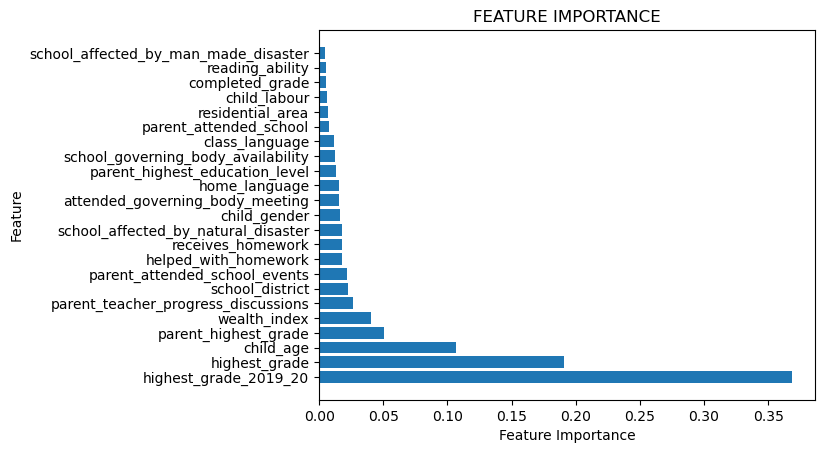

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# Get feature importances from the trained model
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]


# Select the top 10 features
num_features = 23
top_indices = indices[:num_features]
top_importances = importances[top_indices]


# Print the top 10 feature rankings
print("Top 10 feature rankings:")
for f in range(num_features):  # Use num_features instead of 10
    print(f"{f+1}. {X_train.columns[indices[f]]}: {importances[indices[f]]}")
# Plot the top 10 feature importances in a horizontal bar chart
plt.barh(range(num_features), top_importances, align="center")
plt.yticks(range(num_features), X_train.columns[top_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title('FEATURE IMPORTANCE')
plt.show()

Top 10 feature rankings:
1. highest_grade_2019_20: 0.36817198334638795
2. highest_grade: 0.19057262468665923
3. child_age: 0.10642009172977955
4. parent_highest_grade: 0.05069588200846744
5. wealth_index: 0.040726782379701364
6. parent_teacher_progress_discussions: 0.02666068797354002
7. school_district: 0.022368760674284286


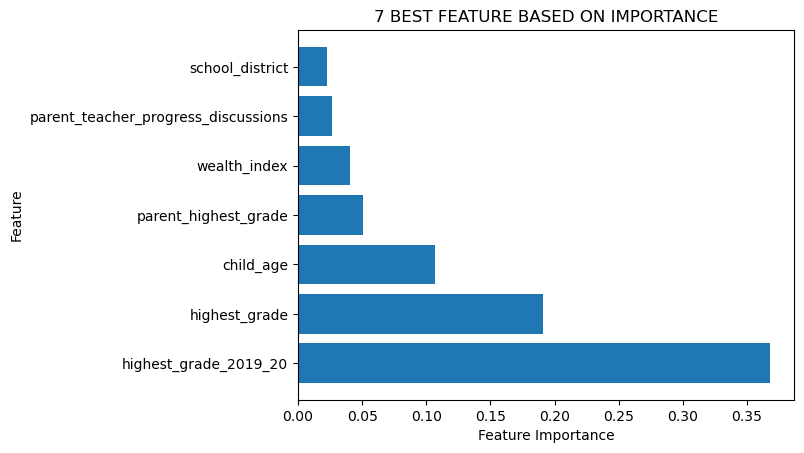

In [26]:
import numpy as np
import matplotlib.pyplot as plt
# Get feature importances from the trained model
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]


# Select the top 10 features
num_features = 7
top_indices = indices[:num_features]
top_importances = importances[top_indices]


# Print the top 10 feature rankings
print("Top 10 feature rankings:")
for f in range(num_features):  # Use num_features instead of 10
    print(f"{f+1}. {X_train.columns[indices[f]]}: {importances[indices[f]]}")
# Plot the top 10 feature importances in a horizontal bar chart
plt.barh(range(num_features), top_importances, align="center")
plt.yticks(range(num_features), X_train.columns[top_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title('7 BEST FEATURE BASED ON IMPORTANCE')
plt.show()

In [27]:
print('training ExtraTreesClassifier\n')
# Initialize the model
ET = ExtraTreesClassifier()

# Train the model
start = time.time()
ET.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = ET.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
ET.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = ET.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

training ExtraTreesClassifier

time taken for training 2.079

Validation Accuracy: 0.95

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2636
           1       0.93      0.99      0.95      2636

    accuracy                           0.95      5272
   macro avg       0.96      0.95      0.95      5272
weighted avg       0.96      0.95      0.95      5272

time taken for training on the full training + validation set 2.747 seconds

Test Accuracy: 0.96

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2636
           1       0.94      0.99      0.96      2636

    accuracy                           0.96      5272
   macro avg       0.96      0.96      0.96      5272
weighted avg       0.96      0.96      0.96      5272

Confusion Matrix:
[[2454  182]
 [  18 2618]]


In [28]:
print('training BaggingClassifier\n')
# Initialize the model
BC = BaggingClassifier()

# Train the model
start = time.time()
BC.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = BC.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
BC.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = BC.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

training BaggingClassifier

time taken for training 0.528

Validation Accuracy: 0.95

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2636
           1       0.91      0.99      0.95      2636

    accuracy                           0.95      5272
   macro avg       0.95      0.95      0.95      5272
weighted avg       0.95      0.95      0.95      5272

time taken for training on the full training + validation set 0.529 seconds

Test Accuracy: 0.96

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.95      2636
           1       0.92      1.00      0.96      2636

    accuracy                           0.96      5272
   macro avg       0.96      0.96      0.96      5272
weighted avg       0.96      0.96      0.96      5272

Confusion Matrix:
[[2418  218]
 [  12 2624]]


In [29]:
print('training XGBClassifier\n')
# Initialize the model
XC = XGBClassifier()

# Train the model
start = time.time()
XC.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = XC.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
XC.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = XC.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

training XGBClassifier

time taken for training 0.433

Validation Accuracy: 0.93

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      2636
           1       0.89      0.99      0.94      2636

    accuracy                           0.93      5272
   macro avg       0.94      0.93      0.93      5272
weighted avg       0.94      0.93      0.93      5272

time taken for training on the full training + validation set 0.469 seconds

Test Accuracy: 0.94

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2636
           1       0.90      0.99      0.94      2636

    accuracy                           0.94      5272
   macro avg       0.94      0.94      0.94      5272
weighted avg       0.94      0.94      0.94      5272

Confusion Matrix:
[[2332  304]
 [  23 2613]]


In [30]:
print('training LogisticRegression\n')
# Initialize the model
LG = LogisticRegression()

# Train the model
start = time.time()
LG.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = LG.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
LG.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = LG.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

training LogisticRegression

time taken for training 0.175

Validation Accuracy: 0.86

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84      2636
           1       0.80      0.96      0.87      2636

    accuracy                           0.86      5272
   macro avg       0.87      0.86      0.86      5272
weighted avg       0.87      0.86      0.86      5272

time taken for training on the full training + validation set 0.201 seconds

Test Accuracy: 0.87

Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      2636
           1       0.81      0.95      0.88      2636

    accuracy                           0.87      5272
   macro avg       0.88      0.87      0.86      5272
weighted avg       0.88      0.87      0.86      5272

Confusion Matrix:
[[2048  588]
 [ 122 2514]]


In [31]:
# Define the parameter grid
param_grid = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None,10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_leaf_nodes': [5, 10, 20],
        'min_impurity_decrease': [0.0, 0.1, 0.2],
        'ccp_alpha': [0.0, 0.1, 0.2]
    }
    
# Create a DecisionTreeClassifier instance
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV instance
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

KeyboardInterrupt: 

In [ ]:
print('training DecisionTreeClassifier with hyperparameters \n')
# Initialize the model
DT = grid_search.best_estimator_

# Train the model
start = time.time()
DT.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = DT.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
DT.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = DT.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Training with 7 Best Features

In [34]:
best_features = ['school_district',
                 'parent_teacher_progress_discussions',
                 'parent_highest_grade',
                 'child_age',
                 'highest_grade',
                 'wealth_index',
                 'highest_grade_2019_20']

In [37]:
X[best_features].head()

,school_district,parent_teacher_progress_discussions,parent_highest_grade,child_age,highest_grade,wealth_index,highest_grade_2019_20
0,0.50,0.33,0.57,0.83,0.86,0.50,0.71
1,0.50,0.33,0.86,0.75,0.71,0.25,0.57
2,0.50,0.33,0.14,0.92,0.86,0.75,0.71
3,0.50,0.33,0.71,0.08,0.00,0.00,0.00
4,0.50,0.33,0.71,0.67,0.86,0.75,0.86


In [38]:
# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X[best_features], y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

In [39]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [01:34<00:02,  2.78s/it]

[LightGBM] [Info] Number of positive: 7907, number of negative: 7907
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 56
[LightGBM] [Info] Number of data points in the train set: 15814, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:34<00:00,  3.28s/it]


In [40]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.93,0.93,0.93,0.93,0.06
RandomForestClassifier,0.93,0.93,0.93,0.93,1.32
ExtraTreeClassifier,0.93,0.93,0.93,0.93,0.05
ExtraTreesClassifier,0.93,0.93,0.93,0.93,1.16
BaggingClassifier,0.93,0.93,0.93,0.93,0.22
LabelPropagation,0.93,0.93,0.93,0.93,13.53
LabelSpreading,0.93,0.93,0.93,0.93,32.61
XGBClassifier,0.92,0.92,0.92,0.92,0.48
LGBMClassifier,0.92,0.92,0.92,0.92,0.35


In [41]:
import time

In [42]:
print('training RandomForestClassifier\n')
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
model.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

training RandomForestClassifier

time taken for training 1.16

Validation Accuracy: 0.93

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2636
           1       0.89      0.97      0.93      2636

    accuracy                           0.93      5272
   macro avg       0.93      0.93      0.93      5272
weighted avg       0.93      0.93      0.93      5272

time taken for training on the full training + validation set 1.447 seconds

Test Accuracy: 0.93

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2636
           1       0.89      0.99      0.94      2636

    accuracy                           0.93      5272
   macro avg       0.94      0.93      0.93      5272
weighted avg       0.94      0.93      0.93      5272

Confusion Matrix:
[[2316  320]
 [  35 2601]]


In [43]:
print('training DecisionTreeClassifier\n')
# Initialize the model
DT = DecisionTreeClassifier()

# Train the model
start = time.time()
DT.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = DT.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
DT.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = DT.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

training DecisionTreeClassifier

time taken for training 0.031

Validation Accuracy: 0.93

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2636
           1       0.89      0.97      0.93      2636

    accuracy                           0.93      5272
   macro avg       0.93      0.93      0.93      5272
weighted avg       0.93      0.93      0.93      5272

time taken for training on the full training + validation set 0.094 seconds

Test Accuracy: 0.93

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      2636
           1       0.90      0.98      0.94      2636

    accuracy                           0.93      5272
   macro avg       0.94      0.93      0.93      5272
weighted avg       0.94      0.93      0.93      5272

Confusion Matrix:
[[2334  302]
 [  47 2589]]


Top 10 feature rankings:
1. highest_grade_2019_20: 0.4766087655194527
2. highest_grade: 0.2402554974132205
3. child_age: 0.14827530960122884
4. parent_highest_grade: 0.05313887867257524
5. wealth_index: 0.037161660220412576
6. parent_teacher_progress_discussions: 0.028505844913129966
7. school_district: 0.016054043659980238


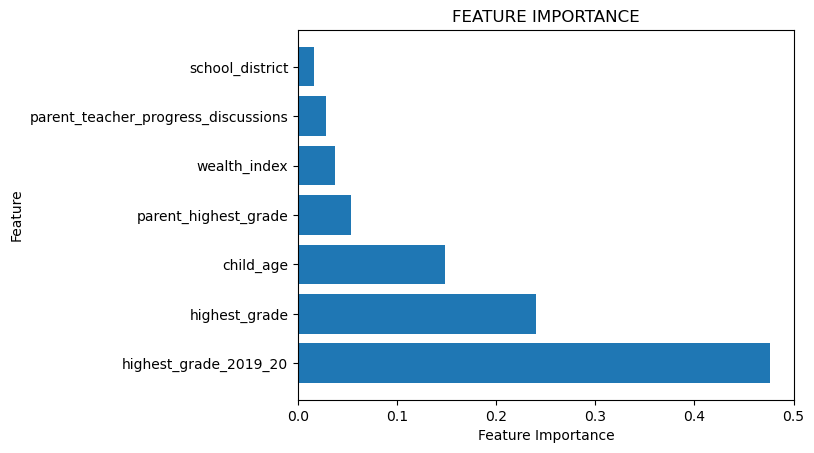

In [45]:
import numpy as np
import matplotlib.pyplot as plt
# Get feature importances from the trained model
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]


# Select the top 10 features
num_features = 7
top_indices = indices[:num_features]
top_importances = importances[top_indices]


# Print the top 10 feature rankings
print("Top 10 feature rankings:")
for f in range(num_features):  # Use num_features instead of 10
    print(f"{f+1}. {X_train.columns[indices[f]]}: {importances[indices[f]]}")
# Plot the top 10 feature importances in a horizontal bar chart
plt.barh(range(num_features), top_importances, align="center")
plt.yticks(range(num_features), X_train.columns[top_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title('FEATURE IMPORTANCE')
plt.show()

In [46]:
print('training ExtraTreesClassifier\n')
# Initialize the model
ET = ExtraTreesClassifier()

# Train the model
start = time.time()
ET.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = ET.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
ET.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = ET.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

training ExtraTreesClassifier

time taken for training 1.136

Validation Accuracy: 0.93

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      2636
           1       0.90      0.97      0.93      2636

    accuracy                           0.93      5272
   macro avg       0.93      0.93      0.93      5272
weighted avg       0.93      0.93      0.93      5272

time taken for training on the full training + validation set 1.3 seconds

Test Accuracy: 0.93

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      2636
           1       0.90      0.98      0.94      2636

    accuracy                           0.93      5272
   macro avg       0.94      0.93      0.93      5272
weighted avg       0.94      0.93      0.93      5272

Confusion Matrix:
[[2336  300]
 [  47 2589]]


In [74]:
print('training BaggingClassifier\n')
# Initialize the model
BC = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',splitter='best'))

# Train the model
start = time.time()
BC.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = BC.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
BC.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = BC.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

training BaggingClassifier

time taken for training 0.23

Validation Accuracy: 0.93

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2636
           1       0.89      0.97      0.93      2636

    accuracy                           0.93      5272
   macro avg       0.93      0.93      0.93      5272
weighted avg       0.93      0.93      0.93      5272

time taken for training on the full training + validation set 0.224 seconds

Test Accuracy: 0.93

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2636
           1       0.89      0.98      0.94      2636

    accuracy                           0.93      5272
   macro avg       0.94      0.93      0.93      5272
weighted avg       0.94      0.93      0.93      5272

Confusion Matrix:
[[2323  313]
 [  44 2592]]


In [48]:
print('training XGBClassifier\n')
# Initialize the model
XC = XGBClassifier()

# Train the model
start = time.time()
XC.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = XC.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
XC.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = XC.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

training XGBClassifier

time taken for training 0.364

Validation Accuracy: 0.92

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      2636
           1       0.88      0.98      0.93      2636

    accuracy                           0.92      5272
   macro avg       0.93      0.92      0.92      5272
weighted avg       0.93      0.92      0.92      5272

time taken for training on the full training + validation set 0.322 seconds

Test Accuracy: 0.93

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2636
           1       0.88      0.98      0.93      2636

    accuracy                           0.93      5272
   macro avg       0.93      0.93      0.93      5272
weighted avg       0.93      0.93      0.93      5272

Confusion Matrix:
[[2293  343]
 [  47 2589]]


In [49]:
print('training LogisticRegression\n')
# Initialize the model
LG = LogisticRegression()

# Train the model
start = time.time()
LG.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = LG.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
LG.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = LG.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

training LogisticRegression

time taken for training 0.123

Validation Accuracy: 0.86

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.84      2636
           1       0.79      0.98      0.88      2636

    accuracy                           0.86      5272
   macro avg       0.88      0.86      0.86      5272
weighted avg       0.88      0.86      0.86      5272

time taken for training on the full training + validation set 0.07 seconds

Test Accuracy: 0.87

Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      2636
           1       0.80      0.98      0.88      2636

    accuracy                           0.87      5272
   macro avg       0.89      0.87      0.87      5272
weighted avg       0.89      0.87      0.87      5272

Confusion Matrix:
[[2006  630]
 [  56 2580]]


In [50]:
# Define the parameter grid
param_grid = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None,10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_leaf_nodes': [5, 10, 20],
        'min_impurity_decrease': [0.0, 0.1, 0.2],
        'ccp_alpha': [0.0, 0.1, 0.2]
    }
    
# Create a DecisionTreeClassifier instance
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV instance
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Best Score: 0.9146331025857763


In [76]:
print('training DecisionTreeClassifier\n')
# Initialize the model
DT = DecisionTreeClassifier(
    criterion='gini',
    splitter='random',
    max_depth=10,
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.0,
    max_leaf_nodes=20,
    min_impurity_decrease=10
)

# Train the model
start = time.time()
DT.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = DT.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
DT.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = DT.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

training DecisionTreeClassifier

time taken for training 0.01

Validation Accuracy: 0.50

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2636
           1       0.00      0.00      0.00      2636

    accuracy                           0.50      5272
   macro avg       0.25      0.50      0.33      5272
weighted avg       0.25      0.50      0.33      5272

time taken for training on the full training + validation set 0.02 seconds

Test Accuracy: 0.50

Test Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2636
           1       0.00      0.00      0.00      2636

    accuracy                           0.50      5272
   macro avg       0.25      0.50      0.33      5272
weighted avg       0.25      0.50      0.33      5272

Confusion Matrix:
[[2636    0]
 [2636    0]]


In [60]:
# Define the model
model = LogisticRegression(max_iter=200, random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'l1_ratio': [0, 0.5, 1]  # Only used if penalty is elasticnet
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
print('Performing grid search...')
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print(f'Grid search completed in {round(end-start,3)} seconds\n')

# Print the best parameters found
print(f"Best parameters found: {grid_search.best_params_}\n")

# Use the best estimator found by GridSearchCV
best_model = grid_search.best_estimator_

# Train the best model
print('Training LogisticRegression with best parameters\n')
start = time.time()
best_model.fit(X_train, y_train)
end = time.time()
print(f'Time taken for training: {round(end-start,3)} seconds\n')

# Validate the model
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the best model on the full training + validation set
print('Training on the full training + validation set\n')
start = time.time()
best_model.fit(X_train_val, y_train_val)
end = time.time()
print(f'Time taken for training on the full training + validation set: {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Performing grid search...
Grid search completed in 118.904 seconds

Best parameters found: {'C': 1, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'sag'}

Training LogisticRegression with best parameters

Time taken for training: 0.154 seconds

Validation Accuracy: 0.86

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.84      2636
           1       0.79      0.98      0.88      2636

    accuracy                           0.86      5272
   macro avg       0.88      0.86      0.86      5272
weighted avg       0.88      0.86      0.86      5272

Training on the full training + validation set

Time taken for training on the full training + validation set: 0.181 seconds

Test Accuracy: 0.87

Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      2636
           1       0.80      0.98      0.88      2636

    accuracy                     

In [61]:
# Define the model
model = XGBClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
print('Performing grid search...')
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print(f'Grid search completed in {round(end-start, 3)} seconds\n')

# Print the best parameters found
print(f"Best parameters found: {grid_search.best_params_}\n")

# Use the best estimator found by GridSearchCV
best_model = grid_search.best_estimator_

# Train the best model
print('Training XGBClassifier with best parameters\n')
start = time.time()
best_model.fit(X_train, y_train)
end = time.time()
print(f'Time taken for training: {round(end-start, 3)} seconds\n')

# Validate the model
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the best model on the full training + validation set
print('Training on the full training + validation set\n')
start = time.time()
best_model.fit(X_train_val, y_train_val)
end = time.time()
print(f'Time taken for training on the full training + validation set: {round(end-start, 3)} seconds\n')

# Test the model
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Performing grid search...
Grid search completed in 182.552 seconds

Best parameters found: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

Training XGBClassifier with best parameters

Time taken for training: 0.788 seconds

Validation Accuracy: 0.92

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      2636
           1       0.88      0.98      0.93      2636

    accuracy                           0.92      5272
   macro avg       0.93      0.92      0.92      5272
weighted avg       0.93      0.92      0.92      5272

Training on the full training + validation set

Time taken for training on the full training + validation set: 0.872 seconds

Test Accuracy: 0.93

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2636
           1       0.89      0.98      0.93     

In [65]:
model = XGBClassifier(random_state=42, colsample_bytree= 0.9, 
                       learning_rate= 0.2, 
                        max_depth= 7, 
                       n_estimators= 200, 
                       subsample= 0.8
                      )

# Train the best model
print('Training XGBClassifier with best parameters\n')
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print(f'Time taken for training: {round(end-start, 3)} seconds\n')

# Validate the model
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the best model on the full training + validation set
print('Training on the full training + validation set\n')
start = time.time()
model.fit(X_train_val, y_train_val)
end = time.time()
print(f'Time taken for training on the full training + validation set: {round(end-start, 3)} seconds\n')

# Test the model
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training XGBClassifier with best parameters

Time taken for training: 0.868 seconds

Validation Accuracy: 0.92

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      2636
           1       0.88      0.98      0.93      2636

    accuracy                           0.92      5272
   macro avg       0.93      0.92      0.92      5272
weighted avg       0.93      0.92      0.92      5272

Training on the full training + validation set

Time taken for training on the full training + validation set: 0.966 seconds

Test Accuracy: 0.93

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2636
           1       0.89      0.98      0.93      2636

    accuracy                           0.93      5272
   macro avg       0.94      0.93      0.93      5272
weighted avg       0.94      0.93      0.93      5272

Confusion Matrix:
[[2312 

In [66]:
# Define the base model and BaggingClassifier
base_model = DecisionTreeClassifier(random_state=42)
model = BaggingClassifier(base_estimator=base_model, random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
print('Performing grid search...')
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print(f'Grid search completed in {round(end-start, 3)} seconds\n')

# Print the best parameters found
print(f"Best parameters found: {grid_search.best_params_}\n")

# Use the best estimator found by GridSearchCV
best_model = grid_search.best_estimator_

# Train the best model
print('Training BaggingClassifier with best parameters\n')
start = time.time()
best_model.fit(X_train, y_train)
end = time.time()
print(f'Time taken for training: {round(end-start, 3)} seconds\n')

# Validate the model
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the best model on the full training + validation set
print('Training on the full training + validation set\n')
start = time.time()
best_model.fit(X_train_val, y_train_val)
end = time.time()
print(f'Time taken for training on the full training + validation set: {round(end-start, 3)} seconds\n')

# Test the model
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Performing grid search...
Grid search completed in 135.148 seconds

Best parameters found: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}

Training BaggingClassifier with best parameters

Time taken for training: 0.68 seconds

Validation Accuracy: 0.93

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.92      2636
           1       0.89      0.98      0.93      2636

    accuracy                           0.93      5272
   macro avg       0.93      0.93      0.93      5272
weighted avg       0.93      0.93      0.93      5272

Training on the full training + validation set

Time taken for training on the full training + validation set: 0.863 seconds

Test Accuracy: 0.93

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2636
           1       0.89      0.98    

In [77]:
# Define the model
model = ExtraTreesClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [False, True]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
print('Performing grid search...')
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print(f'Grid search completed in {round(end-start, 3)} seconds\n')

# Print the best parameters found
print(f"Best parameters found: {grid_search.best_params_}\n")

# Use the best estimator found by GridSearchCV
best_model = grid_search.best_estimator_

# Train the best model
print('Training ExtraTreesClassifier with best parameters\n')
start = time.time()
best_model.fit(X_train, y_train)
end = time.time()
print(f'Time taken for training: {round(end-start, 3)} seconds\n')

# Validate the model
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the best model on the full training + validation set
print('Training on the full training + validation set\n')
start = time.time()
best_model.fit(X_train_val, y_train_val)
end = time.time()
print(f'Time taken for training on the full training + validation set: {round(end-start, 3)} seconds\n')

# Test the model
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Performing grid search...
Grid search completed in 436.049 seconds

Best parameters found: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Training ExtraTreesClassifier with best parameters

Time taken for training: 1.363 seconds

Validation Accuracy: 0.93

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2636
           1       0.89      0.98      0.93      2636

    accuracy                           0.93      5272
   macro avg       0.93      0.93      0.93      5272
weighted avg       0.93      0.93      0.93      5272

Training on the full training + validation set

Time taken for training on the full training + validation set: 1.468 seconds

Test Accuracy: 0.93

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2636
           1       0.89      0.99     

In [78]:
# Define the model
model = RandomForestClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
print('Performing grid search...')
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print(f'Grid search completed in {round(end-start, 3)} seconds\n')

# Print the best parameters found
print(f"Best parameters found: {grid_search.best_params_}\n")

# Use the best estimator found by GridSearchCV
best_model = grid_search.best_estimator_

# Train the best model
print('Training RandomForestClassifier with best parameters\n')
start = time.time()
best_model.fit(X_train, y_train)
end = time.time()
print(f'Time taken for training: {round(end-start, 3)} seconds\n')

# Validate the model
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the best model on the full training + validation set
print('Training on the full training + validation set\n')
start = time.time()
best_model.fit(X_train_val, y_train_val)
end = time.time()
print(f'Time taken for training on the full training + validation set: {round(end-start, 3)} seconds\n')

# Test the model
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Performing grid search...
Grid search completed in 808.841 seconds

Best parameters found: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Training RandomForestClassifier with best parameters

Time taken for training: 2.13 seconds

Validation Accuracy: 0.93

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.92      2636
           1       0.89      0.98      0.93      2636

    accuracy                           0.93      5272
   macro avg       0.93      0.93      0.93      5272
weighted avg       0.93      0.93      0.93      5272

Training on the full training + validation set

Time taken for training on the full training + validation set: 2.611 seconds

Test Accuracy: 0.93

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2636
           1       0.89      0.99     

In [79]:
import joblib

In [80]:
print('training ExtraTreesClassifier Before Hyper-Parameter Finetuned\n')
# Initialize the model
ET = ExtraTreesClassifier()

# Train the model
start = time.time()
ET.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = ET.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
ET.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = ET.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

training ExtraTreesClassifier Before Hyper-Parameter Finetuned

time taken for training 1.551

Validation Accuracy: 0.93

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      2636
           1       0.90      0.97      0.93      2636

    accuracy                           0.93      5272
   macro avg       0.93      0.93      0.93      5272
weighted avg       0.93      0.93      0.93      5272

time taken for training on the full training + validation set 1.375 seconds

Test Accuracy: 0.93

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      2636
           1       0.90      0.98      0.94      2636

    accuracy                           0.93      5272
   macro avg       0.94      0.93      0.93      5272
weighted avg       0.94      0.93      0.93      5272

Confusion Matrix:
[[2335  301]
 [  47 2589]]


In [84]:
joblib.dump(ET,'extraTrees_default.pkl',compress=7)

['extraTrees_default.pkl']

In [85]:
print('training ExtraTreesClassifier After Hyper-Parameter Finetuned\n')
# Initialize the model
ET = ExtraTreesClassifier(bootstrap=False, max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators=100)

# Train the model
start = time.time()
ET.fit(X_train, y_train)
end = time.time()
print(f'time taken for training {round(end-start,3)}\n')

# Validate the model
y_val_pred = ET.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}\n")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Train the model on the full training + validation set
start = time.time()
ET.fit(X_train_val, y_train_val)
end = time.time()
print(f'time taken for training on the full training + validation set {round(end-start,3)} seconds\n')

# Test the model
y_test_pred = ET.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

training ExtraTreesClassifier After Hyper-Parameter Finetuned

time taken for training 1.271

Validation Accuracy: 0.93

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2636
           1       0.89      0.98      0.93      2636

    accuracy                           0.93      5272
   macro avg       0.93      0.93      0.93      5272
weighted avg       0.93      0.93      0.93      5272

time taken for training on the full training + validation set 1.423 seconds

Test Accuracy: 0.93

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2636
           1       0.89      0.99      0.94      2636

    accuracy                           0.93      5272
   macro avg       0.94      0.93      0.93      5272
weighted avg       0.94      0.93      0.93      5272

Confusion Matrix:
[[2322  314]
 [  37 2599]]


In [86]:
joblib.dump(ET,'extraTrees_finetuned.pkl',compress=7)

['extraTrees_finetuned.pkl']

In [88]:
best_features

['school_district',
 'parent_teacher_progress_discussions',
 'parent_highest_grade',
 'child_age',
 'highest_grade',
 'wealth_index',
 'highest_grade_2019_20']

In [89]:
joblib.dump(best_features,'features.pkl')

['features.pkl']

In [94]:
joblib.dump(minMax,'featuresScaleMinMax.pkl')

['featuresScaleMinMax.pkl']

In [96]:
lod = joblib.load('extraTrees_default.pkl')

In [97]:
type(lod)

sklearn.ensemble._forest.ExtraTreesClassifier